# Zomato Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato_data.csv")

In [3]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def HandleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(HandleRate)


In [5]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


types of resturant

## Identify Popular Restaurant Types

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


ques 1

<Axes: xlabel='listed_in(type)', ylabel='count'>

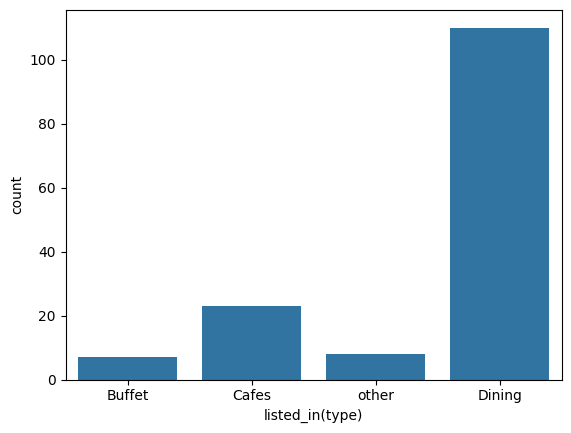

In [8]:
sns.countplot( data = df, x = "listed_in(type)")


### After analysis, it was found that the descending count of popular restaurant types is as follows: Dining, Cafes, Other, and Buffet. This indicates that customers predominantly prefer dining experiences, followed by cafes, while buffet options rank lower in popularity.

## Vote Count for Restaurant Types

In [9]:
grouped_data =df.groupby("listed_in(type)")["votes"].sum()

In [10]:
grouped_data


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [11]:
result =pd.DataFrame(grouped_data)
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


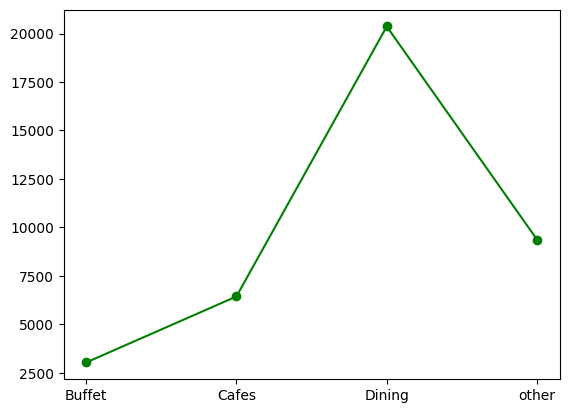

In [12]:
plt.plot(result, c="green" , marker="o")



### The analysis revealed that the maximum vote count is for Dining, followed by Other, Cafes, and Buffet. This trend reinforces the popularity of dining experiences among customers, highlighting a strong preference for restaurants that provide a complete dining atmosphere.

## Restaurant Ratings

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


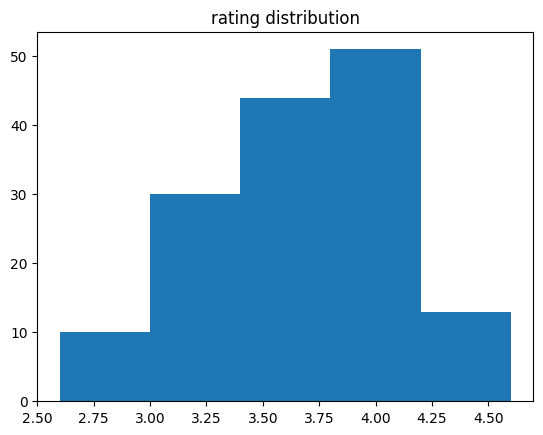

In [14]:
plt.hist(df["rate"],bins=5)
plt.title("rating distribution")
plt.show()

### The ratings for restaurants were found to range from 3.5 to 4.2. This indicates a generally positive reception from customers, suggesting that most restaurants are meeting customer expectations and providing satisfactory dining experiences.

## Average Spending by Couples

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

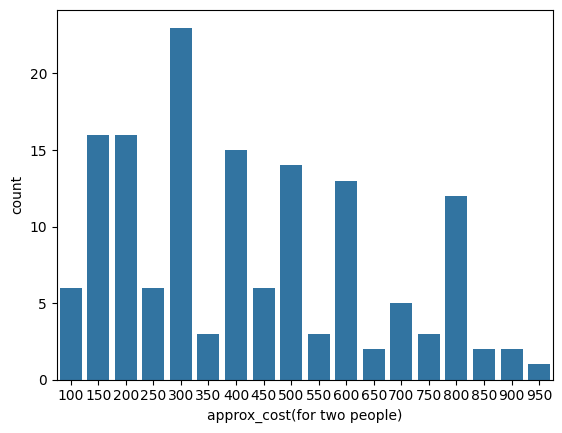

In [16]:
couple_data =df["approx_cost(for two people)"]
sns.countplot(x= couple_data)

### The analysis indicates that the majority of couples prefer restaurants with an approximate cost of 300 rupees per order. This insight can help Zomato tailor their promotions and recommendations to better suit this demographic's spending habits.

## Comparison of Ordering Modes

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

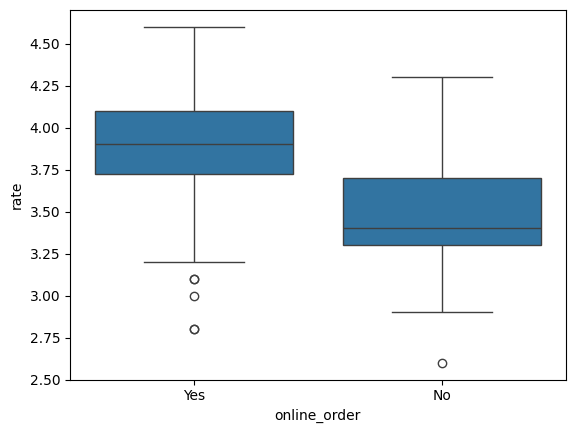

In [18]:
sns.boxplot(x= "online_order", y= "rate", data = df)

### The analysis shows that offline orders received lower ratings compared to online orders. This suggests that customers may have a better overall experience when ordering online, highlighting an opportunity for Zomato to enhance the offline ordering experience.

## Offline Orders Insights

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Heat map')

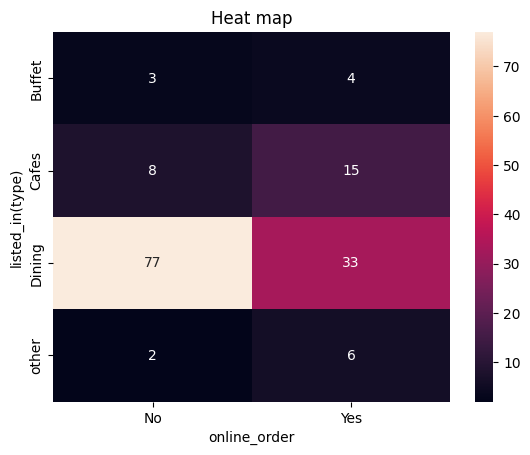

In [20]:
pivot_table = df.pivot_table(index = "listed_in(type)", columns = "online_order",aggfunc = "size",fill_value =0)
sns.heatmap(pivot_table, annot=True,fmt="d")
plt.title("Heat map")

### The analysis revealed that dining restaurants received the maximum number of offline orders compared to online orders. In contrast, cafes received more online orders than offline orders. This indicates a distinct preference for dining experiences in offline settings, while cafes are more popular among online customers. Zomato can leverage this information to create targeted offers for offline dining experiences and enhance online marketing for cafes.